In [1]:
import pandas as pd

In [2]:
import glob

In [3]:
glob.glob("*")

['HRGP_pollen_exp.csv', 'Untitled.ipynb', 'HRGP_motif_X.csv']

In [81]:
X = pd.read_csv("HRGP_motif_X.csv",index_col=0)

In [77]:
X.head()

,gimme_92_MDmodule_Motif.12.3,gimme_105_Improbizer_AACACACGTTTATTAGATGTTT,gimme_143_MEME_4_w12,gimme_146_MEME_7_w12,gimme_102_Improbizer_GCGTTATACCCGAGGATCAG,gimme_16_BioProspector_w12_1,gimme_132_MEME_3_w10,gimme_104_Improbizer_GTGCAACGGAGAGT,DME_MARKGDSRGA,DME_ARRTCYKVRG,gimme_13_BioProspector_w10_3,DME_GRHTGDTGA,DME_GADGAYKAS,DME_ACDGWGMYA,DME_GATYTKRHG
AT3G57690,7.250264,4.829738,5.931814,0.000000,4.279014,5.638272,5.277366,4.101824,4.434152,0.000000,5.394695,4.486782,5.048662,5.394695,4.327902
AT1G49270,4.351640,7.137869,4.701147,4.838632,4.320572,4.809668,4.399027,0.000000,5.610834,5.694649,5.694649,4.148130,5.048662,4.832683,4.327902
AT3G18810,4.311580,7.137869,6.688246,5.459671,5.962574,6.118615,4.399027,5.605548,4.070581,5.694649,5.694649,4.341989,4.276544,4.832683,5.308919
AT4G30590,0.000000,0.000000,6.950782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT3G01700,4.381952,6.617983,4.913640,6.886057,6.137272,5.331614,4.703335,5.347754,4.950782,5.954677,4.987163,5.394695,5.394695,0.000000,5.048662


In [8]:
Y.head()

,1
0,
AT1G24520,9906.370
AT1G31250,0.115
AT1G35230,0.090
AT1G63530,0.000
AT1G63540,0.000


In [33]:
Y.head()

AT3G57690    19083.900
AT1G49270      419.170
AT3G18810      649.225
AT4G30590        0.120
AT3G01700     8655.260
Name: 1, dtype: float64

In [42]:
Y = pd.read_csv("HRGP_pollen_exp.csv",header=None,index_col=0)
Y = Y.loc[X.index][1]
Y

AT3G57690    19083.900
AT1G49270      419.170
AT3G18810      649.225
AT4G30590        0.120
AT3G01700     8655.260
               ...    
AT4G13390        0.000
AT1G23040        0.000
AT3G50570        0.220
AT2G22470        0.395
AT5G35190        0.000
Name: 1, Length: 165, dtype: float64

In [113]:
# def sklearn_GBT_reg(par=False):

# 	return est, myDict

# def sklearn_RF_reg(par=False):

# def xgb_reg(par=False):
Y = pd.read_csv("HRGP_pollen_exp.csv",header=None,index_col=0)
Y = Y.loc[X.index]
Y[1] = [np.log2(i+1) for i in Y[1]]
Y=Y[1]
model,_ = sklearn_GBT_reg()
model = GradientBoostingRegressor(n_estimators=100,random_state=0,
            subsample=0.3,criterion="mae",min_samples_split=5,max_depth=1)
kf = KFold(n_splits=3)
my_pred=[]
my_true=[]
index_list=[]
for i,j in kf.split(Y):
    train_index = X.iloc[i].index.tolist()
    test_index = X.iloc[j].index.tolist()
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    
    model.fit(X_train,y_train)
    pred_y1 = model.predict(X_test)
    my_pred += pred_y1.tolist()
    my_true += y_test.tolist()
    index_list += test_index
df = pd.DataFrame()
df['true']=my_true
df['pred']=my_pred
df.index = index_list
r,p=scipy.stats.pearsonr(my_true, my_pred)

print (r)

0.6101984340717866


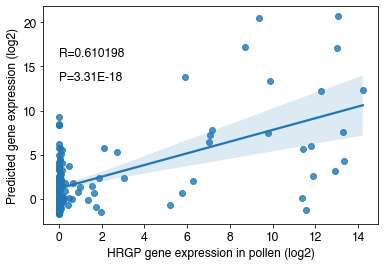

In [132]:

plt.figure()
# sns.regplot(x=df['true'],y=df['pred'],x_bins =100)
sns.regplot(x=df['true'],y=df['pred'])
r,p = scipy.stats.pearsonr(df["pred"],df["true"])
plt.xlabel("HRGP gene expression in pollen (log2)")
plt.ylabel("Predicted gene expression (log2)")
plt.text(df['true'].quantile(.05), df['pred'].quantile(.98), 'R=%f'%(r))
plt.text(df['true'].quantile(.05), df['pred'].quantile(.97), 'P=%.2E'%(Decimal(p)))

plt.savefig("%s_correlation_plot.pdf"%("HRGP"), bbox_inches='tight')

Text(0, 0.5, 'Feature importance')

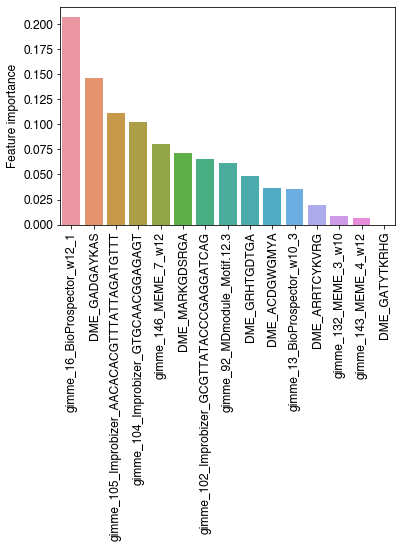

In [134]:
current_feature_df = pd.DataFrame()
current_feature_df['features'] = X.columns.tolist()

model.fit(X,Y)
current_feature_df['score'] = list(model.feature_importances_) 

current_feature_df = current_feature_df.sort_values('score',ascending=False)


plt.figure()
sns.barplot(x=current_feature_df['features'],y=current_feature_df['score'] )
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Feature importance")
# plt.savefig("%s_feature_importance.pdf"%(output), bbox_inches='tight')	

In [70]:
df['error'] = df['pred'] - df['true']

In [71]:
df = df.sort_values("error")

In [116]:
model.feature_importance_

AttributeError: 'GradientBoostingRegressor' object has no attribute 'feature_importance_'

In [73]:
X.loc[df[df.error>7].index]

,gimme_92_MDmodule_Motif.12.3,gimme_105_Improbizer_AACACACGTTTATTAGATGTTT,gimme_143_MEME_4_w12,gimme_146_MEME_7_w12,gimme_102_Improbizer_GCGTTATACCCGAGGATCAG,gimme_16_BioProspector_w12_1,gimme_132_MEME_3_w10,gimme_104_Improbizer_GTGCAACGGAGAGT,DME_MARKGDSRGA,DME_ARRTCYKVRG,gimme_13_BioProspector_w10_3,DME_GRHTGDTGA,DME_GADGAYKAS,DME_ACDGWGMYA,DME_GATYTKRHG
AT2G47930,3.764472,3.277366,2.943095,4.136083,5.013228,3.625252,4.542118,3.686133,3.235077,4.009217,2.651695,3.823909,3.493495,2.991400,4.703335
AT4G32490,3.370590,3.966576,3.085657,4.322393,5.600326,2.518557,3.329754,3.327902,3.235077,3.052566,5.694649,4.425969,4.692504,4.832683,3.299296
AT2G33790,3.450997,4.102923,3.790485,2.863279,3.395774,3.222573,3.093126,3.242604,3.166216,3.181115,3.182435,3.443697,2.610834,2.917215,3.471083
AT1G21310,3.197911,3.647817,2.782516,3.187087,3.120331,4.190440,2.653647,3.832683,3.517126,2.686133,3.227678,2.906578,2.533132,3.360514,3.619789
AT4G32710,4.104577,3.928118,3.473661,2.610834,3.363512,6.152427,2.627088,3.326058,3.166216,3.896196,3.030584,3.669586,3.621602,2.812479,3.610834


In [75]:
X.loc[df[df.error>7].index]

,gimme_92_MDmodule_Motif.12.3,gimme_105_Improbizer_AACACACGTTTATTAGATGTTT,gimme_143_MEME_4_w12,gimme_146_MEME_7_w12,gimme_102_Improbizer_GCGTTATACCCGAGGATCAG,gimme_16_BioProspector_w12_1,gimme_132_MEME_3_w10,gimme_104_Improbizer_GTGCAACGGAGAGT,DME_MARKGDSRGA,DME_ARRTCYKVRG,gimme_13_BioProspector_w10_3,DME_GRHTGDTGA,DME_GADGAYKAS,DME_ACDGWGMYA,DME_GATYTKRHG
AT2G47930,0.000000,0.000000,0.0,4.136083,5.013228,0.000000,4.542118,0.0,0.0,4.009217,0.000000,0.000000,0.000000,0.000000,4.703335
AT4G32490,0.000000,0.000000,0.0,4.322393,5.600326,0.000000,0.000000,0.0,0.0,0.000000,5.694649,4.425969,4.692504,4.832683,0.000000
AT2G33790,0.000000,4.102923,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT1G21310,0.000000,0.000000,0.0,0.000000,0.000000,4.190440,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AT4G32710,4.104577,0.000000,0.0,0.000000,0.000000,6.152427,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


from scipy import interp
import argparse
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pylab as plt
import scipy
import glob


from decimal import Decimal

from scipy import interp
import argparse
import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pylab as plt
import scipy
import glob
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import roc_curve,roc_auc_score,average_precision_score
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
from copy import deepcopy as dp
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge,Lars,BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.svm import SVR,LinearSVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from decimal import Decimal





def MAE_grid(estimator,parameterDict,X,y):
    myModel = GridSearchCV(estimator,parameterDict,scoring="neg_mean_absolute_error",cv=3,verbose=10,n_jobs=10,refit=True)
    myModel.fit(X,y)
    return myModel


def sklearn_GBT_reg(par=False):
	est = GradientBoostingRegressor(n_estimators=100)
	if par:
		est = GradientBoostingRegressor(**par)
	myDict = {}
	myDict['loss']=['ls','lad']
	myDict['learning_rate']=[0.05,0.1]
	myDict['max_depth']=[5,8]
	return est, myDict

def sklearn_RF_reg(par=False):
	est = RandomForestRegressor(n_estimators=300)
	if par:
		est = RandomForestRegressor(**par)
	myDict = {}
	myDict['min_samples_split']=[2,3,5]
	myDict['min_samples_leaf']=[1,2,3]
	myDict['max_depth']=[3,5,7,10]
	myDict['criterion']=['mse','mae']
	return est, myDict
	
	
def xgb_reg(par=False):
	est = XGBRegressor(n_estimators=300,objective="reg:squarederror")
	if par:
		est = XGBRegressor(**par)
	myDict = {}
	myDict['learning_rate']=[0.01,0.05,0.1,0.2,0.3]
	myDict['max_depth']=[3,5,8,11,15]
	myDict['gamma']=[0,0.1,0.5,1]
	myDict['subsample']=[0.6,0.9]
	myDict['colsample_bylevel']=[0.6,0.9]
	myDict['reg_alpha']=[0,1,5]
	myDict['reg_lambda']=[0,1,5]
	return est, myDict

def ridge_reg(par=False):
	est = Ridge()
	if par:
		est = Ridge(**par)	
	myDict = {}
	myDict['alpha']=[0.1,0.5,1,2]
	return est, myDict
def lasso_reg(par=False):
	est = Lasso()
	if par:
		est = Lasso(**par)	
	myDict = {}
	myDict['alpha']=[0.1,0.5,1,2]
	return est, myDict
def Lars_reg(par=False):
	est = Lars()
	if par:
		est = Lars(**par)	
	myDict = {}
	myDict['n_nonzero_coefs']=[1,5,10,50,100,200,300]
	return est, myDict
def BayesianRidge_reg(par=False):
	est = BayesianRidge()
	if par:
		est = BayesianRidge(**par)	
	myDict = {}
	myDict['alpha_1']=[1e-10,1e-5,1e-3,0.1]
	myDict['alpha_2']=[1e-10,1e-5,1e-3,0.1]
	myDict['lambda_1']=[1e-10,1e-5,1e-3,0.1]
	myDict['lambda_2']=[1e-10,1e-5,1e-3,0.1]
	return est, myDict
def KernelRidge_reg(par=False):
	## dual_coef_ is not working
	est = KernelRidge()
	if par:
		est = KernelRidge(**par)	
	myDict = {}
	myDict['alpha']=[1e-5,1e-3,0.1,0.5,1,2]
	myDict['gamma']=[1e-5,1e-3,0.1,0.5,1,2]
	myDict['kernel']=['linear','rbf']

	return est, myDict
def SVM_reg(par=False):
	est = SVR(kernel="linear")
	if par:
		est = SVR(**par)	
	myDict = {}
	myDict['C']=[1e-5,1e-3,0.1,0.5,1,2,10,100]
	myDict['gamma']=[1e-5,1e-3,0.1,0.5,1,2]
	myDict['kernel']=['linear']

	return est, myDict

def linear_stacking_reg(X,y):
	RANDOM_SEED=0
	reg1,dict1 = SVM_reg()
	reg2,dict2 = sklearn_GBT_reg()
	reg3,dict3 = xgb_reg()
	reg4,dict4 = ridge_reg()
	reg5,dict5 = lasso_reg()
	reg6,dict6 = Lars_reg()
	reg7,dict7 = KNeighborsRegressor_reg()
	reg8,dict8 = sklearn_RF_reg()
	reg9,dict9 = KernelRidge_reg()
	reg10,dict10 = BayesianRidge_reg()
	params ={}
	my_dict_list = [dict1,dict2,dict3,dict4,dict5,dict6,dict7,dict8,dict9,dict10]
	name_list = ["svr","gradientboostingregressor","xgbregressor",
				"ridge","lasso","lars","kneighborsregressor","randomforestregressor",
				"kernelridge","meta_regressor"]
	for i in range(len(my_dict_list)):
		current_dict = my_dict_list[i]
		for xx in current_dict:
			if i == 9:
				continue
			params['%s__%s'%(name_list[i],xx)]=current_dict[xx]
	linear_stacker = StackingCVRegressor(regressors=(reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9),
					meta_regressor=reg10,use_features_in_secondary=True)

	grid = RandomizedSearchCV(linear_stacker,params,n_iter=10,n_jobs=10,scoring="neg_mean_absolute_error",cv=3,verbose=10)

	linear_stacker.fit(X.values,y)
	# grid.fit(X.values,y)
	
	# print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
	# best_model = grid.best_estimator_ 
	
	return linear_stacker
def define_cell(x):
	cells=['K562','U2OS','HEK293T','HELA']
	for c in cells:
		if c in x:
			return c
	return "HEK293T"
	

def KNeighborsRegressor_reg(par=False):
	est = KNeighborsRegressor()
	if par:
		est = KNeighborsRegressor(**par)	
	myDict = {}
	myDict['n_neighbors']=[1,2,3,5,10,20]
	myDict['leaf_size']=[1,5,10,20]
	myDict['p']=[1,2]
	myDict['weights']=['uniform','distance']

	return est, myDict
											
def recursive_feature_elimination_reg(reg,X,y):
	features = X.columns
	score_list = []
	my_feature_score_df = pd.DataFrame()
	feature_list = []
	for i in range(len(features-1)):
		X = X[features]
		feature_list.append(features)
		current_feature_df = pd.DataFrame()
		current_feature_df['features'] = features
		# print (current_feature_df.shape)
		X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
		reg.fit(X_train,y_train)
		y_pred = reg.predict(X_test)
		MAE_score = mean_absolute_error(y_test, y_pred)
		score_list.append(MAE_score)
		# print (i,MAE_score)
		# print (len(reg.feature_importances_ ))
		try:
			current_feature_df['score'] = list(reg.feature_importances_) 
		except:
			try:
				current_feature_df['score'] = list(reg.coef_) 
			except:
				# print (reg.coef_[0])
				# current_feature_df['score'] = list(reg.dual_coef_) 
				current_feature_df['score'] = list(reg.coef_[0]) 
				
		current_feature_df = current_feature_df.sort_values('score')
		current_feature_df = current_feature_df.reset_index(drop=True)
		current_feature_df = current_feature_df.drop(0)
		features = current_feature_df['features'].tolist()
	my_feature_score_df['score'] = 	score_list
	my_feature_score_df['features'] = 	feature_list
	my_feature_score_df = my_feature_score_df.sort_values('score')
	best_MAE = my_feature_score_df['score'].tolist()[0]
	best_featureSet = my_feature_score_df['features'].tolist()[0]
	print ("Best MAE is %s, using %s features"%(best_MAE,len(best_featureSet)))
	return best_featureSet



def loo_reg(reg,X,y):
	my_pred = []
	my_true = []   
	index_list = []
	for i in X.index:
		print (i)
		train_X = X.drop([i])
		train_y = y.drop([i])
		test_X = pd.DataFrame(X.loc[i]).T
		test_y = y.loc[i]
		reg.fit(train_X.values,train_y)
		pred_y = reg.predict(test_X.values)
		my_pred.append(pred_y[0])
		my_true.append(test_y)
		# print (pred_y,test_y)
		index_list.append(i)
	return my_true,my_pred,index_list

def get_top_features(reg,X,y,top_n):

	current_feature_df = pd.DataFrame()
	current_feature_df['features'] = X.columns.tolist()

	reg.fit(X,y)
	try:
		current_feature_df['score'] = list(reg.feature_importances_) 
	except:
		try:
			current_feature_df['score'] = list(reg.coef_) 
		except:
			current_feature_df['score'] = list(reg.coef_[0]) 
				
	current_feature_df = current_feature_df.sort_values('score',ascending=False)
	return current_feature_df['features'].tolist()[:top_n]
	
	

def leave_N_sample_out(y):
	"""
	output a list of train test index
	
	y is df, with index showing as sample ID
	
	"""
	kf = KFold(n_splits=10,shuffle=True)
	
	
	df = pd.DataFrame(y.copy())
	# print (df[df.columns[0]])
	# print (df[df.columns[1]].tolist())
	df['group'] = [x.split("_REP")[0] for x in df.index.tolist()]

	out = []
	group_list = df['group'].unique().tolist()
	for i,j in kf.split(group_list):
		# print ("inside",)
		train_group = [group_list[x] for x in i]
		test_group = [group_list[x] for x in j]
		train = df[df['group'].isin(train_group)].index.tolist()
		# print ("inside",train)
		test = df[df['group'].isin(test_group)].index.tolist()
		out.append([train,test])
	return out
	
def simple_CV_evaluation_regression(X,y,model1,method='leave_N_sample_out'):

	split_method = {}
	split_method['leave_N_sample_out'] = leave_N_sample_out
	split_method['leave_one_gene_out'] = leave_one_gene_out
	
	my_pred=[]
	my_true=[]
	index_list = []
	print (X.shape,y.shape)
	for train_index, test_index in split_method[method](y):
		# print ("train size: %s test size: %s"%(len(train_index),len(test_index)))
		# print (train_index)
		X_train, X_test = X.loc[train_index], X.loc[test_index]
		y_train, y_test = y.loc[train_index], y.loc[test_index]
		model1.fit(X_train,y_train)
		pred_y1 = model1.predict(X_test)


		my_pred += pred_y1.tolist()
		my_true += y_test.tolist()
		index_list += test_index
	df = pd.DataFrame()
	df['true']=my_true
	df['pred']=my_pred
	df.index = index_list
	r2=r2_score(my_true, my_pred)
	print (len(my_true),len(my_pred))
	r,p=scipy.stats.pearsonr(my_true, my_pred)
	residule_plot(my_pred,[my_true[i]-my_pred[i] for i in range(len(my_true))],my_true)
	print (r,r2)
	return df



def predict_line(x,y_test,y_pred): 
    plt.scatter(x, y_test,  color='black')
    plt.plot(x, y_pred, color='blue', linewidth=3)
def pred_true_feature_scatter_plot(x,y,z):
    f, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(x=x,y=y,s=20,hue=z,alpha=0.5,palette="Spectral_r")
#     add_identity(ax, color='grey', ls='-')
    plt.xlabel("pred")
    plt.ylabel("true")
    
    plt.xlim(np.min(x)-0.5,np.max(x)*1.1)
    plt.ylim(np.min(y)-0.5,np.max(y)*1.1)
def residule_plot(feature,error,true):
    SE_std = np.std(error)
    SE = [error[i]/feature[i] for i in range(len(error))]
    f, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(x=feature,y=error,s=20,hue=true,alpha=0.5,palette="Spectral_r")
    plt.xlabel("predict value")
    plt.ylabel("error")
    
    plt.xlim(np.min(feature)-0.5,np.max(feature)*1.1)
    plt.ylim(np.min(error)-0.5,np.max(error)*1.1)
def feature_true_plot(feature,true):
    f, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(x=feature,y=true,s=20,color="black",alpha=0.5)
    plt.xlabel("feature")
    plt.ylabel("target value")
#     plt.xlim(np.min(feature)-0.5,np.max(feature)*1.1)
#     plt.ylim(np.min(error)-0.5,np.max(error)*1.1)

def leave_one_gene_out(y):
	"""
	output a list of train test index
	
	y is df, with index showing as sample ID
	
	not good
	
	"""
	df = pd.DataFrame(y.copy())
	# print (df[df.columns[0]])
	# print (df[df.columns[1]].tolist())
	df['gene'] = [define_gene(x) for x in df.index.tolist()]
	index_set = set(df.index.tolist())
	out = []
	for s,d in df.groupby('gene'):
		test = d.index.tolist()
		train = list(index_set - set(test))
		out.append([train,test])
	return out
matplotlib.rcParams['font.sans-serif'] = ['sans-serif']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Helvetica')
matplotlib.rcParams.update({'font.size': 12})